In [4]:
#import pakages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read datasets
file_path = '.\dataset\student'
df_por = pd.read_csv(os.path.join(file_path,'student-por.csv'),sep=',')
df_mat = pd.read_csv(os.path.join(file_path,'student-mat.csv'),sep=',')

In [6]:
#length of 2 datasests
print('df_por length : ', len(df_por), 
      '\n\nMissing Values\n\n',
      df_por.isnull().sum(),
      '\n\n\ndf_mat length : ', len(df_mat),
     '\n\nMissing Values\n\n',
      df_mat.isnull().sum())

df_por length :  649 

Missing Values

 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64 


df_mat length :  395 

Missing Values

 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel  

In [7]:
#Attributes such as "school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob",
#"reason","nursery" and "internet" cannot be changed.
#It means that if there are students who responded identically about these attributes in both survey,
#they are the same people.

same_index = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
df_all = pd.merge(df_por,df_mat, on = same_index)
df_all = df_all.rename(columns = 
                       {'G1_x':'G1_por','G2_x':'G2_por','G3_x':'G3_por',
                        'G1_y':'G1_mat','G2_y':'G2_mat','G3_y':'G3_mat',
                       'paid_x':'paid_por','paid_y':'paid_mat'})
df_all.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_por', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_por', 'G2_por', 'G3_por', 'guardian_y', 'traveltime_y',
       'studytime_y', 'failures_y', 'schoolsup_y', 'famsup_y', 'paid_mat',
       'activities_y', 'higher_y', 'romantic_y', 'famrel_y', 'freetime_y',
       'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y', 'G1_mat',
       'G2_mat', 'G3_mat'],
      dtype='object')

In [8]:
#there are students who reported differntly on the surveys

index_x = ['guardian_x', 'traveltime_x', 'studytime_x','failures_x', 
        'schoolsup_x', 'famsup_x', 'activities_x', 
         'higher_x', 'romantic_x', 'famrel_x','freetime_x', 
        'goout_x', 'Dalc_x', 'Walc_x', 'health_x','absences_x']
index_y = ['guardian_y', 'traveltime_y','studytime_y', 'failures_y', 
        'schoolsup_y', 'famsup_y', 'activities_y', 
        'higher_y', 'romantic_y', 'famrel_y', 'freetime_y',
        'goout_y', 'Dalc_y', 'Walc_y', 'health_y','absences_y']
for i in range(len(index_x)):
    print('\n diffenent values:' ,
          len(df_all) - sum(df_all[index_x[i]] == df_all[index_y[i]]))
    for v in range(len(df_all)):
        if (df_all[index_x[i]] != df_all[index_y[i]])[v]:
            print(df_all.loc[v, [index_x[i],index_y[i]]])


 diffenent values: 6
guardian_x    father
guardian_y    mother
Name: 111, dtype: object
guardian_x    mother
guardian_y    father
Name: 112, dtype: object
guardian_x    father
guardian_y    mother
Name: 122, dtype: object
guardian_x    mother
guardian_y    father
Name: 123, dtype: object
guardian_x    mother
guardian_y    father
Name: 282, dtype: object
guardian_x    father
guardian_y    mother
Name: 283, dtype: object

 diffenent values: 5
traveltime_x    2
traveltime_y    1
Name: 79, dtype: object
traveltime_x    1
traveltime_y    2
Name: 80, dtype: object
traveltime_x    2
traveltime_y    1
Name: 282, dtype: object
traveltime_x    1
traveltime_y    2
Name: 283, dtype: object
traveltime_x    3
traveltime_y    2
Name: 347, dtype: object

 diffenent values: 9
studytime_x    3
studytime_y    2
Name: 111, dtype: object
studytime_x    2
studytime_y    3
Name: 112, dtype: object
studytime_x    2
studytime_y    1
Name: 122, dtype: object
studytime_x    1
studytime_y    2
Name: 123, dtype: 

Name: 86, dtype: object
absences_x    4
absences_y    6
Name: 88, dtype: object
absences_x    6
absences_y    4
Name: 89, dtype: object
absences_x     6
absences_y    12
Name: 91, dtype: object
absences_x     6
absences_y    18
Name: 92, dtype: object
absences_x    2
absences_y    0
Name: 93, dtype: object
absences_x    6
absences_y    4
Name: 94, dtype: object
absences_x    0
absences_y    4
Name: 95, dtype: object
absences_x    2
absences_y    0
Name: 96, dtype: object
absences_x    2
absences_y    6
Name: 97, dtype: object
absences_x    4
absences_y    2
Name: 98, dtype: object
absences_x    6
absences_y    2
Name: 99, dtype: object
absences_x    0
absences_y    2
Name: 100, dtype: object
absences_x    4
absences_y    6
Name: 101, dtype: object
absences_x    2
absences_y    0
Name: 102, dtype: object
absences_x    12
absences_y    14
Name: 103, dtype: object
absences_x    2
absences_y    4
Name: 105, dtype: object
absences_x    16
absences_y    26
Name: 106, dtype: object
absences_x

Name: 381, dtype: object


In [9]:
# guardian
# there are students who reported their guardian as mother in one survey and father in the other 
# it is unlikely that the guardian is changed due to the death of parent. Thus we set plural word, parents 

index = 0 # 'guardian'
df_all['guardian'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['guardian']] = 'parents'
            


In [10]:
#traveltime
#we applied conservative approach on the travel time to school when replacing the different values.
#we decided to always take longest travel time.

index = 1 # 'travaltime'
df_all['traveltime'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['traveltime']] = max([df_all[index_x[index]][v],df_all[index_y[index]][v]])

In [11]:
#studytime
#we also applied conservative approach on the study time when replacing the different values.
#we assumed that students always study less then they reported.
#Thus, we decided to always take shortest study time.

index = 2 # 'studytime'
df_all['studytime'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['studytime']] = min([df_all[index_x[index]][v],df_all[index_y[index]][v]])

In [12]:
#failures
#we assumed that the students might originlly have less failures in one survey,
#but get more when they report on the other survey 

index = 3 # 'failures'
df_all['failures'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['failures']] = max([df_all[index_x[index]][v],df_all[index_y[index]][v]])

In [13]:
#schoolsup & famsup
#we decided to regard the supports as 'yes' if they reported 'yes' in at least one survey

index = 4 # 'schoolsup'
df_all['schoolsup'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['schoolsup']] = 'yes'
            
index = 5 # 'famsup'
df_all['famsup'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['famsup']] = 'yes'        

In [14]:
#activities
#we decided to regard the activities as 'yes' if they reported 'yes' in at least one survey

index = 6 # 'activities'
df_all['activities'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['activities']] = 'yes'

In [15]:
#higher
#we decided to regard the higher as 'yes' if they reported 'yes' in at least one survey

index = 7 # 'higher'
df_all['higher'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['higher']] = 'yes'

In [16]:
#romantic
#we decided to regard the romantic as 'yes' if they reported 'yes' in at least one survey

index = 8 # 'romantic'
df_all['romantic'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['romantic']] = 'yes'

In [17]:
#famrel
#we decided take the higest point of family relationship

index = 9 # 'familiy relationship'
df_all['famrel'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['famrel']] = max([df_all[index_x[index]][v],df_all[index_y[index]][v]])

In [18]:
#freetime & goout
#we applied conservative approach on the free time and going out with friend when replacing the different values.
#we assumed that students always have free time and go out with friend more then they reported.
#Thus, we decided to always take longest freetime and going out

index = 10 # 'freetime'
df_all['freetime'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['freetime']] = max([df_all[index_x[index]][v],df_all[index_y[index]][v]])
            
index = 11 # 'goout'
df_all['goout'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['goout']] = max([df_all[index_x[index]][v],df_all[index_y[index]][v]])

In [19]:
#Dalc & Walc
#we applied conservative approach on the alcohol consumption when replacing the different values.
#we assumed that students always drink more then they reported.
#Thus, we decided to always take more higher values

index = 12 # 'Dalc'
df_all['Dalc'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['Dalc']] = max([df_all[index_x[index]][v],df_all[index_y[index]][v]])
            
index = 13 # 'Walc'
df_all['Walc'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_x[index]])[v]:
            df_all.loc[v,['Walc']] = max([df_all[index_x[index]][v],df_all[index_y[index]][v]])

In [20]:
#health
#we also applied conservative approach on the health status when replacing the different values.
#we assumed that students do not exactly know their health status and, they always overestimate them.

index = 14 # 'health'
df_all['health'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['health']] = min([df_all[index_x[index]][v],df_all[index_y[index]][v]])

In [21]:
#absences
#we assumed that the students might originlly be absent less in one survey,
#but absent more when they report on the other survey 

index = 15 # 'absences'
df_all['absences'] = df_all[index_x[index]]
for v in range(len(df_all)):
        if (df_all[index_x[index]] != df_all[index_y[index]])[v]:
            df_all.loc[v,['absences']] = max([df_all[index_x[index]][v],df_all[index_y[index]][v]])

In [22]:
#delete redundant 
deleting_indices = index_x + index_y
df = df_all.drop(deleting_indices,axis=1)
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'paid_por', 'nursery', 'internet', 'G1_por',
       'G2_por', 'G3_por', 'paid_mat', 'G1_mat', 'G2_mat', 'G3_mat',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'activities', 'higher', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [23]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
le = preprocessing.LabelEncoder()
std = preprocessing.StandardScaler()

In [24]:
#one-hot encoding
#'school', 'sex', 'address', 'famsize', 
#'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'
df2 = df.copy()

school_d = pd.get_dummies(df2['school'],prefix='school')
df2 = pd.concat([df2, school_d],axis=1)

sex_d = pd.get_dummies(df2['sex'],prefix='sex')
df2 = pd.concat([df2, sex_d],axis=1)

address_d = pd.get_dummies(df2['address'],prefix='address')
df2 = pd.concat([df2, address_d],axis=1)

famsize_d = pd.get_dummies(df2['famsize'],prefix='famsize')
df2 = pd.concat([df2, famsize_d],axis=1)

Pstatus_d = pd.get_dummies(df2['Pstatus'],prefix='Pstatus')
df2 = pd.concat([df2, Pstatus_d],axis=1)

Mjob_d = pd.get_dummies(df2['Mjob'],prefix='Mjob')
df2 = pd.concat([df2, Mjob_d],axis=1)

Fjob_d = pd.get_dummies(df2['Fjob'],prefix='Fjob')
df2 = pd.concat([df2, Fjob_d],axis=1)

reason_d = pd.get_dummies(df2['reason'],prefix='reason')
df2 = pd.concat([df2, reason_d],axis=1)

guardian_d = pd.get_dummies(df2['guardian'],prefix='guardian')
df2 = pd.concat([df2, guardian_d],axis=1)

In [25]:
df2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'paid_por', 'nursery', 'internet', 'G1_por',
       'G2_por', 'G3_por', 'paid_mat', 'G1_mat', 'G2_mat', 'G3_mat',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'activities', 'higher', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS',
       'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other',
       'guardian_parents'],
      dtype='object')

In [26]:
#Label Encoding
#'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'

label_dict = {}



label_encoder_columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian']


for column in label_encoder_columns:
    le.fit(df2[column])
    df2[column] = le.transform(df2[column])
    label_dict[column] = [le, list(le.classes_)]
    
    
#Label binarizing
#'schoolsup', 'famsup','activities', 'nursery',  'paid', 'higher', 'internet', 'romantic'

label_binarizer_columns=['schoolsup', 'famsup','activities', 'nursery', 'higher', 'internet', 'romantic','paid_por','paid_mat']


for column in label_binarizer_columns:
    lb.fit(df2[column])
    df2[column] = lb.transform(df2[column])
    label_dict[column] = [lb, list(le.classes_)]


In [27]:
#stanadrdization

std.fit(df2[['absences']])
ab_scaled = std.transform(df2[['absences']])
df2['absences_scaled'] = ab_scaled

In [28]:
#Split X and Y data of studnets who take both portugese and math

y_data_all_list = ['G1_por','G2_por','G3_por','G1_mat','G2_mat','G3_mat']
x_data_all = df2.drop(y_data_all_list,axis=1)
y_data_all = df2[y_data_all_list]

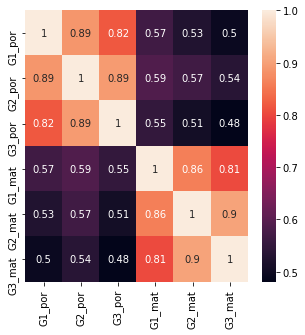

In [29]:
#correatation of the Portugese and Math Score, and each terms

y_data_all_corr = y_data_all.corr()
plt.figure(figsize=(5,5))
ax = sns.heatmap(y_data_all_corr, annot=True)

In [30]:
#Generate normal distribution
nord = np.random.randn(len(y_data_all))
nord = nord*3.3+10
nord = nord.astype(int)
print('min, max, mean, std', nord.min(),nord.max(),nord.mean(),nord.std())

min, max, mean, std 0 18 9.4109947644 3.21420025879


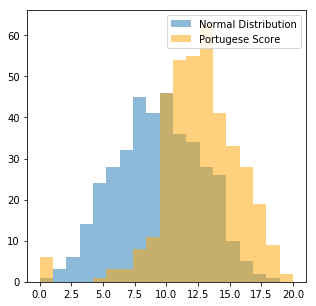

In [31]:
#Distribution of Portugese Score

bins = np.linspace(0,20,20)
plt.figure(figsize=(5,5))
plt.hist(nord,bins,alpha=0.5,label ='Normal Distribution')
plt.hist(y_data_all['G3_por'],bins,alpha=0.5,label = 'Portugese Score',color='orange')
plt.legend(loc = 'upper right')
plt.show()

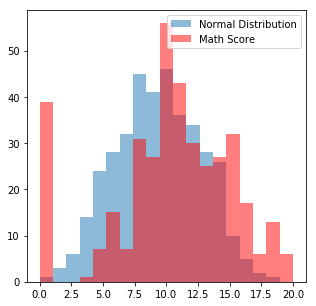

In [32]:
#Distrbution of Math score

bins = np.linspace(0,20,20)
plt.figure(figsize=(5,5))
plt.hist(nord,bins,alpha=0.5,label ='Normal Distribution')
plt.hist(y_data_all['G3_mat'],bins,alpha=0.5,label = 'Math Score',color='red')
plt.legend(loc = 'upper right')
plt.show()

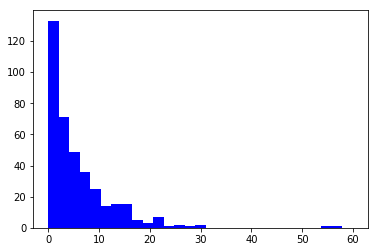

In [33]:
#Histrogram of absences
bins = np.linspace(0,60,30);
plt.hist(x_data_all['absences'],bins,color='blue');

In [34]:
x_data_all.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'paid_por', 'nursery', 'internet', 'paid_mat',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'activities', 'higher', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS',
       'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other',
       'guardian_parents', 'absences_scaled'],
      dtype='object')

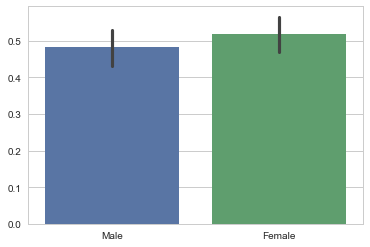

In [35]:
sns.set(style='whitegrid')
bar=('Male','Female')
y_pos = np.arange(len(bar))
ax = sns.barplot(data = x_data_all[['sex_M','sex_F']])
plt.xticks(y_pos,bar);

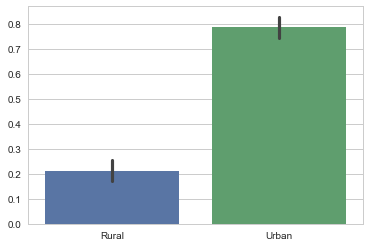

In [36]:
sns.set(style='whitegrid')
bar=('Rural','Urban')
y_pos = np.arange(len(bar))
ax = sns.barplot(data = x_data_all[['address_R', 'address_U']])
plt.xticks(y_pos,bar);

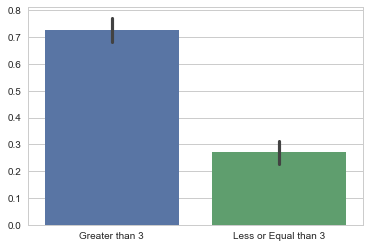

In [37]:
sns.set(style='whitegrid')
bar=('Greater than 3','Less or Equal than 3')
y_pos = np.arange(len(bar))
ax = sns.barplot(data = x_data_all[['famsize_GT3','famsize_LE3']])
plt.xticks(y_pos,bar);

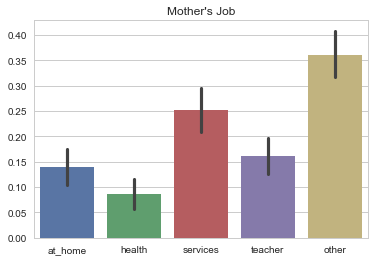

In [38]:
sns.set(style='whitegrid')
bar=('at_home', 'health', 'services', 'teacher','other')
y_pos = np.arange(len(bar))
ax = sns.barplot(data = x_data_all[['Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher','Mjob_other']])
plt.xticks(y_pos,bar);
plt.title("Mother's Job");

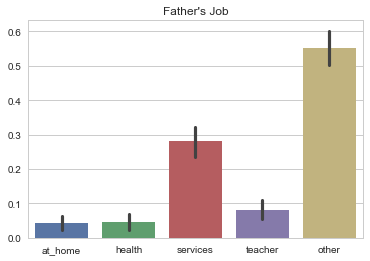

In [39]:
sns.set(style='whitegrid')
bar=('at_home', 'health', 'services', 'teacher','other')
y_pos = np.arange(len(bar))
ax = sns.barplot(data = x_data_all[['Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher','Fjob_other']])
plt.xticks(y_pos,bar);
plt.title("Father's Job");

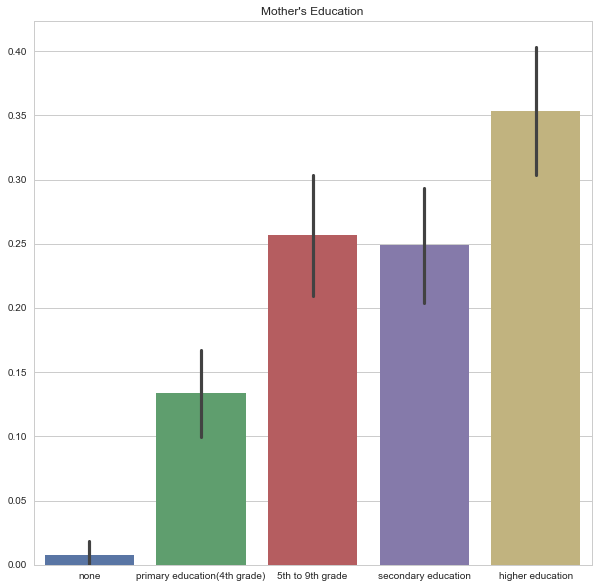

In [40]:
sns.set(style='whitegrid')
bar=('none', 'primary education(4th grade)', '5th to 9th grade', 'secondary education', 'higher education')
y_pos = np.arange(len(bar))
plt.figure(figsize=(10,10))
ax = sns.barplot(data = pd.get_dummies(x_data_all['Medu']))
plt.xticks(y_pos,bar);
plt.title("Mother's Education");

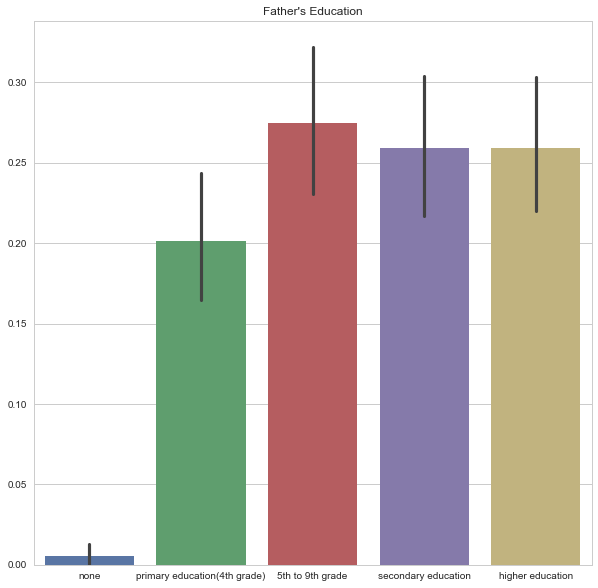

In [41]:
sns.set(style='whitegrid')
bar=('none', 'primary education(4th grade)', '5th to 9th grade', 'secondary education', 'higher education')
y_pos = np.arange(len(bar))
plt.figure(figsize=(10,10))
ax = sns.barplot(data = pd.get_dummies(x_data_all['Fedu']))
plt.xticks(y_pos,bar);
plt.title("Father's Education");

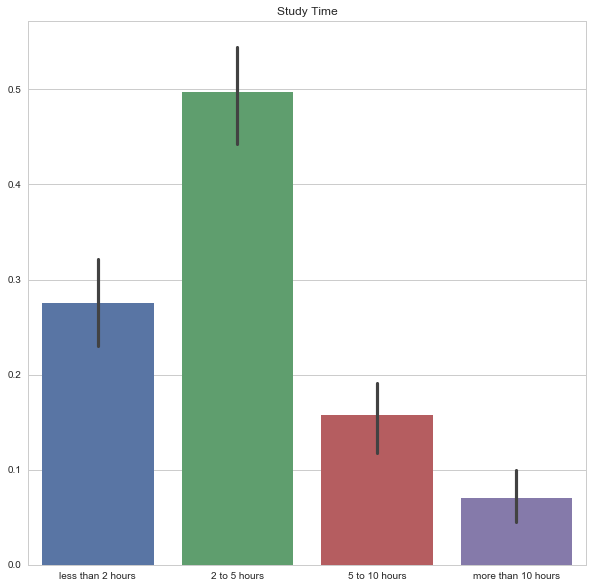

In [42]:
sns.set(style='whitegrid')
bar=('less than 2 hours', '2 to 5 hours', '5 to 10 hours', 'more than 10 hours')
y_pos = np.arange(len(bar))
plt.figure(figsize=(10,10))
ax = sns.barplot(data = pd.get_dummies(x_data_all['studytime']))
plt.xticks(y_pos,bar);
plt.title("Study Time");

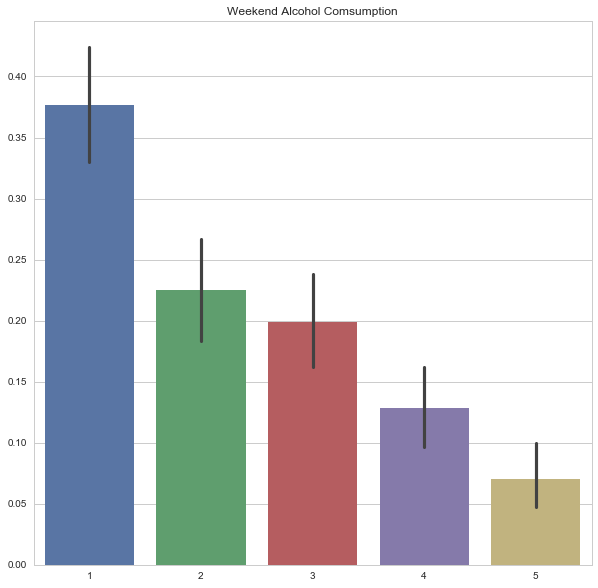

In [43]:
sns.set(style='whitegrid')
bar=('1', '2', '3', '4','5')
y_pos = np.arange(len(bar))
plt.figure(figsize=(10,10))
ax = sns.barplot(data = pd.get_dummies(x_data_all['Walc']))
plt.xticks(y_pos,bar);
plt.title("Weekend Alcohol Comsumption");

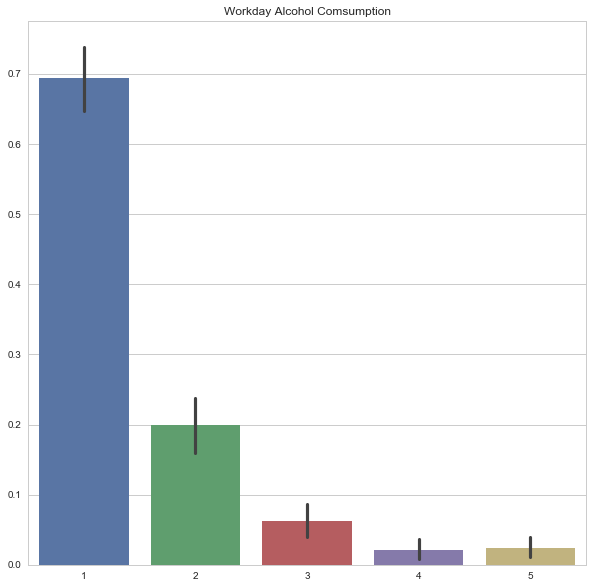

In [44]:
sns.set(style='whitegrid')
bar=('1', '2', '3', '4','5')
y_pos = np.arange(len(bar))
plt.figure(figsize=(10,10))
ax = sns.barplot(data = pd.get_dummies(x_data_all['Dalc']))
plt.xticks(y_pos,bar);
plt.title("Workday Alcohol Comsumption");

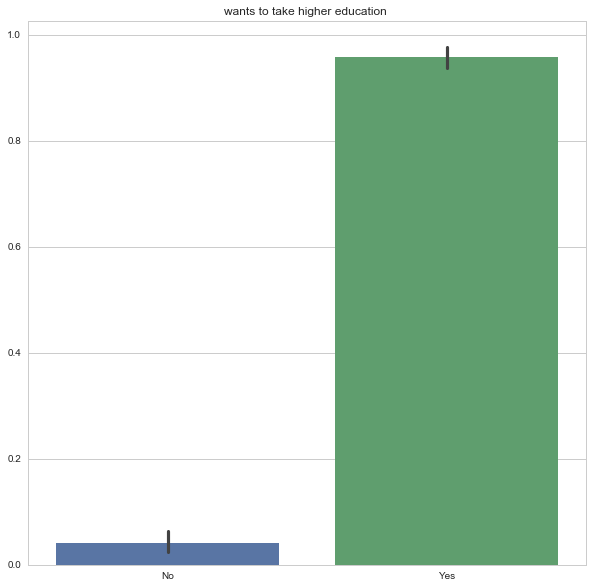

In [45]:
sns.set(style='whitegrid')
bar=('No', 'Yes')
y_pos = np.arange(len(bar))
plt.figure(figsize=(10,10))
ax = sns.barplot(data = pd.get_dummies(x_data_all['higher']))
plt.xticks(y_pos,bar);
plt.title("wants to take higher education ");

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [48]:
#Cross Validation without any categorization of the target value

kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_all, y_data_all['G3_por'], cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.102429,0.062852
SGD_classfier,0.120378,0.079740
KNN,0.143590,0.067470
Naive_bayes,0.049730,0.029870
SVM,0.162146,0.051725
Decision_tree,0.104453,0.054447
Random_forest,0.157220,0.041224


In [99]:
#Cross Validation with categorization of the target value based on portugese qualification system  (6 categories)

bins = [-1,3.4,9.4,13.4,15.4,17.4,20]
group_names = ['Poor','Weak','Sufficient','Good','Very good','Excellent']
y_data_all_por_qual = pd.cut(y_data_all['G3_por'],bins,labels=group_names)
y_data_all_mat_qual = pd.cut(y_data_all['G3_mat'],bins,labels=group_names)


kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_all, y_data_all_por_qual, cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.507760,0.120390
SGD_classfier,0.365317,0.211463
KNN,0.515385,0.105967
Naive_bayes,0.157422,0.093739
SVM,0.570175,0.120339
Decision_tree,0.449595,0.129424
Random_forest,0.570243,0.125265


In [50]:
#Cross Validation with categorization of the target value based on portugese qualification system (3 categories)

bins = [-1,9.4,15.4,20]
group_names = ['Poor or Weak','Sufficient or Good','Very good or Excellent']
y_data_all_por_qual = pd.cut(y_data_all['G3_por'],bins,labels=group_names)
y_data_all_mat_qual = pd.cut(y_data_all['G3_mat'],bins,labels=group_names)


kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_all, y_data_all_por_qual, cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.743117,0.104665
SGD_classfier,0.657018,0.183648
KNN,0.753509,0.116429
Naive_bayes,0.301552,0.110566
SVM,0.763900,0.108940
Decision_tree,0.640823,0.080683
Random_forest,0.761269,0.111129


In [51]:
#Cross Validation with categorization of the target value based on portugese qualification system (2 categories)

bins = [-1,13.4,20]
group_names = ['No Good','Good']
y_data_all_por_qual = pd.cut(y_data_all['G3_por'],bins,labels=group_names)
y_data_all_mat_qual = pd.cut(y_data_all['G3_mat'],bins,labels=group_names)


kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_all, y_data_all_por_qual, cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.678070,0.086220
SGD_classfier,0.617746,0.088123
KNN,0.641768,0.077419
Naive_bayes,0.612888,0.073419
SVM,0.649123,0.118481
Decision_tree,0.662146,0.069704
Random_forest,0.693522,0.118064


In [52]:
#data of portugese class students

#one-hot encoding
#'school', 'sex', 'address', 'famsize', 
#'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'
df_por2 = df_por.copy()

school_d = pd.get_dummies(df_por2['school'],prefix='school')
df_por2 = pd.concat([df_por2, school_d],axis=1)

sex_d = pd.get_dummies(df_por2['sex'],prefix='sex')
df_por2 = pd.concat([df_por2, sex_d],axis=1)

address_d = pd.get_dummies(df_por2['address'],prefix='address')
df_por2 = pd.concat([df_por2, address_d],axis=1)

famsize_d = pd.get_dummies(df_por2['famsize'],prefix='famsize')
df_por2 = pd.concat([df_por2, famsize_d],axis=1)

Pstatus_d = pd.get_dummies(df_por2['Pstatus'],prefix='Pstatus')
df_por2 = pd.concat([df_por2, Pstatus_d],axis=1)

Mjob_d = pd.get_dummies(df_por2['Mjob'],prefix='Mjob')
df_por2 = pd.concat([df_por2, Mjob_d],axis=1)

Fjob_d = pd.get_dummies(df_por2['Fjob'],prefix='Fjob')
df_por2 = pd.concat([df_por2, Fjob_d],axis=1)

reason_d = pd.get_dummies(df_por2['reason'],prefix='reason')
df_por2 = pd.concat([df_por2, reason_d],axis=1)

guardian_d = pd.get_dummies(df_por2['guardian'],prefix='guardian')
df_por2 = pd.concat([df_por2, guardian_d],axis=1)

In [53]:
#Label Encoding
#'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'

label_dict_por = {}



label_encoder_columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian']


for column in label_encoder_columns:
    le.fit(df_por2[column])
    df_por2[column] = le.transform(df_por2[column])
    label_dict_por[column] = [le, list(le.classes_)]
    
    
#Label binarizing
#'schoolsup', 'famsup','activities', 'nursery',  'paid', 'higher', 'internet', 'romantic'

label_binarizer_columns=['schoolsup', 'famsup','activities', 'nursery', 'higher', 'internet', 'romantic','paid']


for column in label_binarizer_columns:
    lb.fit(df_por2[column])
    df_por2[column] = lb.transform(df_por2[column])
    label_dict_por[column] = [lb, list(le.classes_)]

In [54]:
#stanadrdization

std.fit(df_por2[['absences']])
ab_scaled = std.transform(df_por2[['absences']])
df_por2['absences_scaled'] = ab_scaled

In [55]:
#Split X and Y data of studnets who take both portugese

y_data_por_list = ['G1','G2','G3']
x_data_por = df_por2.drop(y_data_por_list,axis=1)
y_data_por = df_por2[y_data_por_list]

In [56]:
#Generate normal distribution
nord_por = np.random.randn(len(y_data_por))
nord_por = nord_por*3.3+10
nord_por = nord_por.astype(int)
print('min, max, mean, std', nord_por.min(),nord_por.max(),nord_por.mean(),nord_por.std())

min, max, mean, std 0 18 9.75654853621 3.18788506692


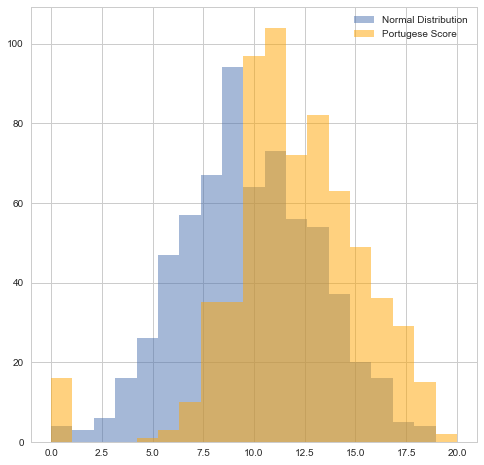

In [57]:
#Distribution of Portugese Score

bins = np.linspace(0,20,20)
plt.figure(figsize=(8,8))
plt.hist(nord_por,bins,alpha=0.5,label ='Normal Distribution')
plt.hist(y_data_por['G3'],bins,alpha=0.5,label = 'Portugese Score',color='orange')
plt.legend(loc = 'upper right')
plt.show()

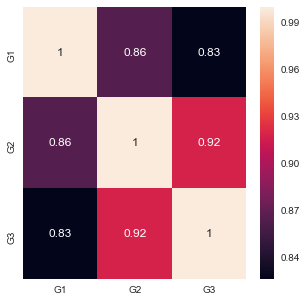

In [58]:
#correatation of the Portugese Score, and each terms

y_data_por_corr = y_data_por.corr()
plt.figure(figsize=(5,5))
ax = sns.heatmap(y_data_por_corr, annot=True)

In [59]:
#Cross Validation without any categorization of the target value

kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_por, y_data_por['G3'], cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.137067,0.033127
SGD_classfier,0.146250,0.060729
KNN,0.164856,0.032236
Naive_bayes,0.067861,0.037991
SVM,0.198654,0.032157
Decision_tree,0.120096,0.050355
Random_forest,0.161731,0.047640


In [60]:
#Cross Validation with categorization of the target value based on portugese qualification system  (6 categories)

bins = [-1,3.4,9.4,13.4,15.4,17.4,20]
group_names = ['Poor','Weak','Sufficient','Good','Very good','Excellent']
y_data_por_qual = pd.cut(y_data_por['G3'],bins,labels=group_names)



kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_por, y_data_por_qual, cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.500433,0.120984
SGD_classfier,0.432452,0.207023
KNN,0.523630,0.102074
Naive_bayes,0.147909,0.034487
SVM,0.546707,0.112805
Decision_tree,0.432837,0.075809
Random_forest,0.554399,0.113552


In [97]:
#Cross Validation with categorization of the target value based on portugese qualification system (3 categories)

bins = [-1,9.4,15.4,20]
group_names = ['Poor or Weak','Sufficient or Good','Very good or Excellent']
y_data_por_qual = pd.cut(y_data_por['G3'],bins,labels=group_names)

kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_por, y_data_por_qual, cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.714663,0.118918
SGD_classfier,0.632933,0.149221
KNN,0.705433,0.102895
Naive_bayes,0.317452,0.066256
SVM,0.719279,0.104667
Decision_tree,0.576130,0.081467
Random_forest,0.713125,0.117899


In [62]:
#Cross Validation with categorization of the target value based on portugese qualification system (2 categories)

bins = [-1,13.4,20]
group_names = ['No Good','Good']
y_data_por_qual = pd.cut(y_data_por['G3'],bins,labels=group_names)


kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_por, y_data_por_qual, cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.730240,0.089931
SGD_classfier,0.600745,0.162267
KNN,0.702668,0.109538
Naive_bayes,0.660986,0.093686
SVM,0.682548,0.129949
Decision_tree,0.668798,0.119229
Random_forest,0.739519,0.106468


In [63]:
y_data_por

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
5,12,12,13
6,13,12,13
7,10,13,13
8,15,16,17
9,12,12,13


In [64]:
#data of math class students

#one-hot encoding
#'school', 'sex', 'address', 'famsize', 
#'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'
df_mat2 = df_mat.copy()

school_d = pd.get_dummies(df_mat2['school'],prefix='school')
df_mat2 = pd.concat([df_mat2, school_d],axis=1)

sex_d = pd.get_dummies(df_mat2['sex'],prefix='sex')
df_mat2 = pd.concat([df_mat2, sex_d],axis=1)

address_d = pd.get_dummies(df_mat2['address'],prefix='address')
df_mat2 = pd.concat([df_mat2, address_d],axis=1)

famsize_d = pd.get_dummies(df_mat2['famsize'],prefix='famsize')
df_mat2 = pd.concat([df_mat2, famsize_d],axis=1)

Pstatus_d = pd.get_dummies(df_mat2['Pstatus'],prefix='Pstatus')
df_mat2 = pd.concat([df_mat2, Pstatus_d],axis=1)

Mjob_d = pd.get_dummies(df_mat2['Mjob'],prefix='Mjob')
df_mat2 = pd.concat([df_mat2, Mjob_d],axis=1)

Fjob_d = pd.get_dummies(df_mat2['Fjob'],prefix='Fjob')
df_mat2 = pd.concat([df_mat2, Fjob_d],axis=1)

reason_d = pd.get_dummies(df_mat2['reason'],prefix='reason')
df_mat2 = pd.concat([df_mat2, reason_d],axis=1)

guardian_d = pd.get_dummies(df_mat2['guardian'],prefix='guardian')
df_mat2 = pd.concat([df_mat2, guardian_d],axis=1)

In [65]:
#Label Encoding
#'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'

label_dict_mat = {}



label_encoder_columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian']


for column in label_encoder_columns:
    le.fit(df_mat2[column])
    df_mat2[column] = le.transform(df_mat2[column])
    label_dict_mat[column] = [le, list(le.classes_)]
    
    
#Label binarizing
#'schoolsup', 'famsup','activities', 'nursery',  'paid', 'higher', 'internet', 'romantic'

label_binarizer_columns=['schoolsup', 'famsup','activities', 'nursery', 'higher', 'internet', 'romantic','paid']


for column in label_binarizer_columns:
    lb.fit(df_mat2[column])
    df_mat2[column] = lb.transform(df_mat2[column])
    label_dict_mat[column] = [lb, list(le.classes_)]

In [66]:
#stanadrdization

std.fit(df_mat2[['absences']])
ab_scaled = std.transform(df_mat2[['absences']])
df_mat2['absences_scaled'] = ab_scaled

In [67]:
#Split X and Y data of studnets who take math
y_data_mat_list = ['G1','G2','G3']
x_data_mat = df_mat2.drop(y_data_mat_list,axis=1)
y_data_mat = df_mat2[y_data_mat_list]

In [68]:
#Generate normal distribution
nord_mat = np.random.randn(len(y_data_mat))
nord_mat = nord_mat*3.3+10
nord_mat = nord_mat.astype(int)
print('min, max, mean, std', nord_mat.min(),nord_mat.max(),nord_mat.mean(),nord_mat.std())

min, max, mean, std 1 20 9.59240506329 3.35169604343


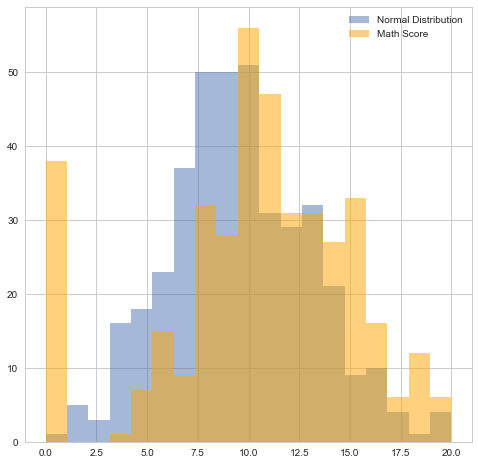

In [69]:
#Distribution of Math Score

bins = np.linspace(0,20,20)
plt.figure(figsize=(8,8))
plt.hist(nord_mat,bins,alpha=0.5,label ='Normal Distribution')
plt.hist(y_data_mat['G3'],bins,alpha=0.5,label = 'Math Score',color='orange')
plt.legend(loc = 'upper right')
plt.show()

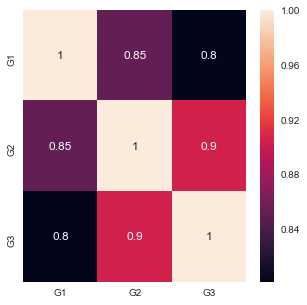

In [70]:
#correatation of the Math Score, and each terms

y_data_mat_corr = y_data_mat.corr()
plt.figure(figsize=(5,5))
ax = sns.heatmap(y_data_mat_corr, annot=True)

In [71]:
#Cross Validation without any categorization of the target value

kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_mat, y_data_mat['G3'], cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.134295,0.037793
SGD_classfier,0.096218,0.056005
KNN,0.149551,0.074623
Naive_bayes,0.040449,0.030316
SVM,0.179872,0.070773
Decision_tree,0.152115,0.047215
Random_forest,0.197500,0.044686


In [72]:
#Cross Validation with categorization of the target value based on portugese qualification system  (6 categories)

bins = [-1,3.4,9.4,13.4,15.4,17.4,20]
group_names = ['Poor','Weak','Sufficient','Good','Very good','Excellent']
y_data_mat_qual = pd.cut(y_data_mat['G3'],bins,labels=group_names)



kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_mat, y_data_mat_qual, cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.402885,0.063353
SGD_classfier,0.352244,0.069092
KNN,0.400577,0.066949
Naive_bayes,0.174872,0.073800
SVM,0.415705,0.071020
Decision_tree,0.344423,0.072751
Random_forest,0.420769,0.058950


In [73]:
#Cross Validation with categorization of the target value based on portugese qualification system (3 categories)

bins = [-1,9.4,15.4,20]
group_names = ['Poor or Weak','Sufficient or Good','Very good or Excellent']
y_data_mat_qual = pd.cut(y_data_mat['G3'],bins,labels=group_names)

kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_mat, y_data_mat_qual, cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.564615,0.082007
SGD_classfier,0.506346,0.074001
KNN,0.579615,0.045209
Naive_bayes,0.293462,0.081185
SVM,0.584936,0.052118
Decision_tree,0.478590,0.059642
Random_forest,0.579679,0.053592


In [74]:
#Cross Validation with categorization of the target value based on portugese qualification system (2 categories)

bins = [-1,13.4,20]
group_names = ['No Good','Good']
y_data_mat_qual = pd.cut(y_data_mat['G3'],bins,labels=group_names)


kfold = KFold(n_splits=10 , random_state=22)
average_cv = []
accuracy = []
std_cv=[]

classifiers = ['Logistic_Reg', 'SGD_classfier', 'KNN', 'Naive_bayes', 'SVM','Decision_tree', 'Random_forest']
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=9),GaussianNB(),
          svm.SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]

for model in models:
    
    cv_result = cross_val_score(model,x_data_mat, y_data_mat_qual, cv = kfold, scoring='accuracy')
    average_cv.append(cv_result.mean())
    std_cv.append(cv_result.std())
    accuracy.append(cv_result)

baseline_estimate_df = pd.DataFrame({'cv_mean' : average_cv,
                                                        'cv_std' : std_cv},index = classifiers)
baseline_estimate_df

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

,cv_mean,cv_std
Logistic_Reg,0.759359,0.063743
SGD_classfier,0.653397,0.094432
KNN,0.747372,0.055158
Naive_bayes,0.590128,0.119405
SVM,0.747115,0.084652
Decision_tree,0.658526,0.040023
Random_forest,0.782372,0.053994


In [90]:
data_por = pd.concat([x_data_por, pd.get_dummies(y_data_por_qual)],axis=1)

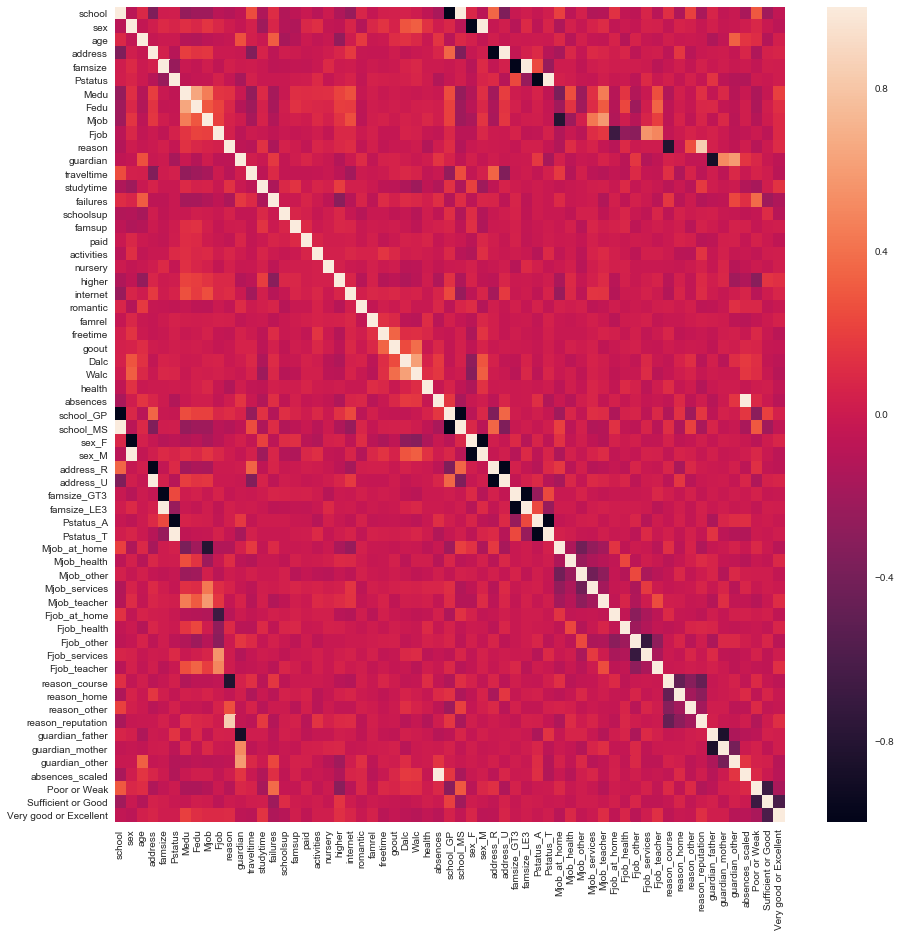

In [96]:
data_por.corr()
y_data_all_corr = data_por.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(y_data_all_corr)

In [100]:
regr=LogisticRegression()

In [112]:
a = regr.fit(x_data_por, y_data_por_qual)

In [118]:
plt.plot(x_data_por, a.coef_*x_data_por + a.intercept_)

ValueError: operands could not be broadcast together with shapes (3,58) (649,58) 